# Predicting Education Score in Pakistan: A Machine Learning Approach

### Syed Zain Haider

-----

# Table of Contents
0. Introduction
1. Project Aim
2. Data Source
4. Data Description
5. Data Cleaning and Exploratory Data Analysis
6. Feature Importance
7. Working Hypothesis
8. Model Development & Validation
9.  Hyperparameter Testing
10. Model Evaluation
11. Limitations
12. Policy Implications

# Introduction


More than 22 million children, aged 5 to 16, in Pakistan do not attend the school (PIDE, 2022). This is 30 percent of the total children between this age bracket in the country. The PSLM Survey 2019-20 showed that at the middle level (ages 10-12), the gross enrollment rate is only 56%. This reduces to 40 and 45 percent, for Balochistan and Sindh respectively. These low rates are alarming and indicate a need for serious assessment & analysis in the education sector.

The Constitution of Pakistan makes the State responsible for providing education to its citizens. [*25A. Right to Education: The State shall provide free and compulsory education to all children of the age of five to sixteen years in such manner as may be determined by law.*] Unfortunately, the government has failed to fulfill its responsibility, and the right of all has turned into a privilege for few. The public education spend as a percentage of GDP in the country is among the lowest in the South Asian region. In Financial Year 2022, the total estimated public expenditure on education was only 1.7 percent (Pakistan Economic Survey 2022-23). This was only 1.4 percent in the preceding financial year (i.e. 2021). The severe lack of investment in the education sector is visible through these numbers.

*Sources:*

1. PIDE 2022 - https://pide.org.pk/research/primary-school-literacy-a-case-study-of-the-educate-a-child-initiative/

2. Pakistan Economic Survey 2022-23: https://www.finance.gov.pk/survey/chapters_23/Economic_Survey_2022_23.pdf




# Project Aim

Our project aims to signify the importance of investment in educational infrastructure and studies the link of it with other education metrics in the country. The project uses data for primary and secondary education levels. We hope to contribute to the significant debate on the need for more public investment in the education sector.

The primary aim of the project is to predict the Education Score in Pakistan using machine learning techniques. We aim to test multiple algorithms, treating our target variable as both a continuous (for regression) and categorical (for classification) variable.

# Literature Review

In the previous studies done to determine the factors for low enrollment rates in schools and poor educational outcomes, the school infrastructure has been found to have a significant impact. Following are some of the examples of these studies:

* An Asian Development Bank report on “Challenges to Education in Pakistan” mentioned that “Non-availability of basic physical facilities, including drinking water, a boundary wall, electricity, and toilets for students and teachers, are the leading causes of high dropout rates. **Inadequate basic infrastructure facilities** (i.e., electricity, water, boundary wall, and toilets) are also one of the leading causes of students’ unwillingness to attend school” (Hiraoka et al. 3)

* A study conducted on primary and middle schools in Punjab found out that **school infrastructure has a significant impact on enrollment**, particularly among female students. “Probability of enrollment for female student increases by 2.72% as a result of one unit improvement in school infrastructure quality” (Bajwa and Tanveer 82)

* In a developmental economics paper on the “Determinants of School Enrollment in Indian Villages”, the authors mention that the “individual and household characteristics as well as **schooling infrastructure** are clearly very important determinants of an individual’s school enrollment decision” (Dostie and Jayaraman 406)

* Besides the school infrastructure, the transportation infrastructure has also been found to have a significant impact on the enrollment in schools, and this impact is higher on the girls. “Long home-to-school commutes and difficult road conditions disproportionately keep girls out of the classroom. In some districts in KP, more than 70 percent of girls are out of school, as compared to 30 percent of boys” (World Bank).

Our project aims to further explore the relationship between the school infrastructure score and the education score.


*Sources:*

1. Bajwa and Tanveer - https://arts.pdn.ac.lk/econ/piers2019/Proceedings2015/Impact%20Assessment%20of%20School%20Infrastructure%20Quality%20Index%20on%20School%20Enrollment-%20A%20Study%20Quantifying%20Gender%20Differentials%20in%20Punjab%20Pakistan.pdf

2. Dostie and Jayaraman - http://www.jstor.org/stable/10.1086/497006

3. Hiraoka et al. - https://www.adb.org/sites/default/files/publication/771091/adb-brief-207-access-challenges-education-pakistan.pdf

4. World Bank - https://www.worldbank.org/en/news/feature/2022/09/08/paving-the-way-to-education-and-opportunity-in-pakistan

# Data Source
This project utilizes the "Pakistan Education Performance Dataset", which has been consolidated from surveys conducted by Alif Ailaan & Aser Pakistan on Primary Schooling Performance. The original data is available on Kaggle, provided by Mesum Raza Hemani.

**Links to the Dataset**
- https://www.kaggle.com/datasets/mesumraza/pakistan-education-performance-dataset
- https://opendata.com.pk/dataset/pakistan-education-performance-dataset

In [ ]:
# Import All Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Google Drive
from google.colab import drive

## SKlearn Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB


In [ ]:
drive.mount('/gdrive')

%cd '/gdrive/MyDrive/Colab Notebooks'

print(os.listdir(os.getcwd()))

In [ ]:
import pandas as pd

# Read the file, use ISO encoding because it was converted from xlsx
df = pd.read_csv('explore.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,...,351415.0,12.0,10.0,AJK,14.8,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,...,301633.0,149.0,19.0,AJK,75.2,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,NaN,...,NaN,6.0,11.0,AJK,0.0,22.463768,5379,43.840580,379,2013
3,60.77%,0.827225,39.23%,0.041885,0.130890,1.57%,22.44%,7.09%,12.20%,600.0,...,150000.0,8.0,25.0,AJK,0.0,13.048128,5379,26.203209,262,2013
4,60.75%,0.592348,39.25%,0.346966,0.060686,7.12%,23.06%,9.78%,13.60%,2162.0,...,834094.0,263.0,46.0,AJK,73.2,20.184453,5379,14.888011,1036,2013


# Data Description

The dataset presents an in-depth analysis of primary education in Pakistan, focusing not just on enrolment but also on school infrastructure and other related factors that impact the quality of education. The data is granular, extending to the district level across the entire country, covering key policy areas such as access to education, quality of education, gender parity, and infrastructure.

The variables in the dataset can broadly be categorized into three main groups:

1. **Student Enrolment and Education Quality Metrics:** These variables provide information on the percentage of boys and girls enrolled in primary school, the composite education score based on access, retention, learning outcomes and gender parity, and the individual scores for enrolment, gender parity, learning and retention
2. **School Infrastructure Metrics:** These variables focus on the availability of essential facilities such as electricity, drinking water, toilet and boundary walls at primary schools. These variables also provide the percentage of schools that are equipped with all, any or none of these basic facilities, as well as the composite school infrastructure score.
3. **Socio-Economic and Geographical Variables:** These variables cover a range of factors such as the area of each district, the occurrence of bomb blasts and drone attacks, the economic growth of Pakistan, the educational budget spend of GDP, the number of schools, and the population size of each district.

Furthermore, some variables provide user interface options for a document or map visualization tool, allowing users to select levels of analysis, measure names for coloring data, and options to show or hide sheets or tables of contents.

The dataset has been used for the Alif Ailaan District Education Rankings, which is an annual exercise started in 2013 to assess both educational outcomes and school infrastructure by comparing the relative performance of different regions in Pakistan. The rankings aim to produce a comprehensive measure of education standards, track performance across regions, create data-driven awareness about education policy, and encourage accurate data collection by government and non-government entities.

The data has been collected from various sources including the Pakistan Social and Living Standards Measurement Survey, the National Education Management Information System, and the Annual Status of Education report. All 148 districts and agencies from Azad Jammu and Kashmir, Balochistan, the Federally Administered Tribal Areas, Gilgit-Baltistan, Khyber Pakhtunkhwa, Punjab, and Sindh are covered in this dataset.


### Variables in the Dataset and Their Descriptions
(Sorted in original order of dataset)
- **% Boys Enrolled:** This variable shows the percentage of boys aged 6-10 who are enrolled in primary school in each district.
- **% Complete Primary Schools:** This variable shows the percentage of primary schools in each district that have all four basic facilities: electricity, drinking water, toilet and boundary wall.
- **% Girls Enrolled:** This variable shows the percentage of girls aged 6-10 who are enrolled in primary school in each district.
- **% Primary Schools with single classroom:** This variable shows the percentage of primary schools in each district that have only one classroom for all grades.
- **% Primary Schools with single teacher:** This variable shows the percentage of primary schools in each district that have only one teacher for all grades.
- **All Four Facilities:** This variable shows the number of primary schools in each district that have all four basic facilities: electricity, drinking water, toilet and boundary wall.
- **Any One Facility:** This variable shows the number of primary schools in each district that have at least one of the four basic facilities: electricity, drinking water, toilet or boundary wall.
- **Any Three Facilities:** This variable shows the number of primary schools in each district that have at least three of the four basic facilities: electricity, drinking water, toilet or boundary wall.
- **Any Two Facilities:** This variable shows the number of primary schools in each district that have at least two of the four basic facilities: electricity, drinking water, toilet or boundary wall.
- **Area (km²):** This variable shows the area of each district in square kilometers.
- **Bomb Blasts Occurred:** This variable shows the number of bomb blasts that occurred in each district in a given year.
- **Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters):** This variable shows the clusters of districts based on their school infrastructure scores for five indicators: boundary wall, building condition satisfactory, drinking water, electricity and toilet. The clusters are labeled as high, medium and low based on their scores.
- **Boundary wall:** This variable shows the number of primary schools in each district that have a boundary wall around them.
- **Building condition satisfactory:** This variable shows the number of primary schools in each district that have a satisfactory building condition, meaning no major repairs are needed.
- **MeasureGroup 1 Measures:** This variable shows the measures that are used to calculate the education score for each district. The measures are enrolment score, learning score, retention score and gender parity score.
- **Color By Measure Value:** This variable shows the color scheme that is used to display the measure values for each district on a map. The colors range from dark green (high value) to dark red (low value).
- **Show Sheet:** This variable shows the option to show or hide a sheet that contains detailed information about a selected district on a map. The sheet includes data on education score, school infrastructure score and other factors such as population, area and terrorist attacks.
- **Table of Contents:** This variable shows the option to show or hide a table of contents that contains links to different sections of the document. The sections include introduction, methodology, education score, school infrastructure score and other factors.
- **Other Factors Measure Value:** This variable shows the value of a selected measure from the other factors section for each district. The other factors include population, area, terrorist attacks and economic growth.
- **Analysis Level Selector:** This variable shows the option to select the level of analysis for displaying data on a map. The levels include province, region and district.
- **Color By Measure Name:** This variable shows the option to select the measure name for coloring data on a map. The measure names include education score, school infrastructure score and other factors.
- **Complete Primary Schools:** This variable shows the number of primary schools in each district that have all four basic facilities: electricity, drinking water, toilet and boundary wall.
- **Country:** This variable shows the name of the country where the districts are located. In this case, it is Pakistan.
- **City:** This variable shows the name of the city where the districts are located. In this case, it is Lahore.
- **Drinking water:** This variable shows the number of primary schools in each district that have access to drinking water.
- **Drone attacks in Pakistan:** This variable shows the number of drone attacks that occurred in Pakistan in a given year.
- **Education score:** This variable shows the composite score based on four sets of indicators related to access, retention, learning outcomes and gender parity for each district. The score ranges from 0 to 100.
- **Educational Budget Spend of GDP:** This variable shows the percentage of gross domestic product (GDP) that Pakistan spends on education in a given year.
- **Electricity:** This variable shows the number of primary schools in each district that have access to electricity.
- **Enrolment score:** This variable shows the score based on the percentage of boys and girls aged 6-10 who are enrolled in primary school for each district. The score ranges from 0 to 100.
- **Gender parity score:** This variable shows the score based on the ratio of girls to boys enrolled in primary school for each district. The score ranges from 0 to 100.
- **Global Terrorism Index - Pakistan:** This variable shows the rank of Pakistan among 163 countries based on the impact of terrorism on its society in a given year. The rank ranges from 1 (most affected) to 163 (least affected).
- **Learning score:** This variable shows the score based on the average test scores of students in grade 5 for mathematics and language for each district. The score ranges from 0 to 100.
- **MeasureGroup 2 Measures:** This variable shows the measures that are used to calculate the school infrastructure score for each district. The measures are boundary wall, building condition satisfactory, drinking water, electricity and toilet.
- **No Facility:** This variable shows the number of primary schools in each district that have none of the four basic facilities: electricity, drinking water, toilet or boundary wall.
- **Number of Records:** This variable shows the number of rows or observations in the dataset.
- **Number of primary schools as % of total schools:** This variable shows the percentage of primary schools out of the total number of schools in each district.
- **Number of primary schools**: This variable shows the number of primary schools in each district.
- **Number of secondary schools as % of total schools:** This variable shows the percentage of secondary schools out of the total number of schools in each district.
- **Number of secondary schools:** This variable shows the number of secondary schools in each district.
- **Pakistan Economic Growth:** This variable shows the annual growth rate of Pakistan's GDP in a given year.
- **Population:** This variable shows the population size of each district.
- **Primary Schools with single classroom:** This variable shows the number of primary schools in each district that have only one classroom for all grades.
- **Primary Schools with single teacher:** This variable shows the number of primary schools in each district that have only one teacher for all grades.
- **Province:** This variable shows the name of the province where the districts are located. In this case, it is Punjab.
- **Retention score:** This variable shows the score based on the percentage of students who complete grade 5 out of those who enroll in grade 1 for each district. The score ranges from 0 to 100.
- **School infrastructure score:** This variable shows the composite score based on five indicators related to basic facilities for each district. The indicators are boundary wall, building condition satisfactory, drinking water, electricity and toilet. The score ranges from 0 to 100.
- **Terrorist Attacks Affectees:** This variable shows the number of people who were killed or injured by terrorist attacks in each district in a given year.
- **Toilet:** This variable shows the number of primary schools in each district that have access to a toilet.
- **Total number of schools:** This variable shows the total number of schools in each district, including primary and secondary schools.
- **Year:** This variable shows the year for which the data was collected.

# Data Cleaning and Exploration
Data cleaning involves looking for inconsistencies, errors, or missing values and deciding how to handle them. We are carrying out this step before model development to ensure our model receives quality data. This stage is crucial as it prepares the data for machine learning models.

Alongside data cleaning, we are carrying out exploratory data analysis (EDA) on the collected data, looking for patterns, anomalies, and relationships within the dataset. This section contains various tables and visualizations which give a deeper understanding of the dataset.

In [ ]:
df.head()

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,...,351415.0,12.0,10.0,AJK,14.8,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,...,301633.0,149.0,19.0,AJK,75.2,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,NaN,...,NaN,6.0,11.0,AJK,0.0,22.463768,5379,43.840580,379,2013
3,60.77%,0.827225,39.23%,0.041885,0.130890,1.57%,22.44%,7.09%,12.20%,600.0,...,150000.0,8.0,25.0,AJK,0.0,13.048128,5379,26.203209,262,2013
4,60.75%,0.592348,39.25%,0.346966,0.060686,7.12%,23.06%,9.78%,13.60%,2162.0,...,834094.0,263.0,46.0,AJK,73.2,20.184453,5379,14.888011,1036,2013


In [ ]:
# See the List of Columns and their datatypes
df.dtypes

% Boys Enrolled                                                                          object
% Complete Primary Schools                                                              float64
% Girls Enrolled                                                                         object
% Primary Schools with single classroom                                                 float64
% Primary Schools with single teacher                                                   float64
All Four Facilities                                                                      object
Any One Facility                                                                         object
Any Three Facilities                                                                     object
Any Two Facilities                                                                       object
Area (km²)                                                                              float64
Bomb Blasts Occurred                    

In [ ]:
# Get Numerical Columns
numerical_cols = df._get_numeric_data().columns

In [ ]:
# Get Categorical Columns
categorical_cols = df.columns[df.dtypes =='object']

In [ ]:
print(f"There are {len(numerical_cols)} Numerical Columns and {len(categorical_cols)} Categorical Columns")

There are 33 Numerical Columns and 18 Categorical Columns


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Normalize column names: remove spaces and convert to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
# df.columns

In [ ]:
## Filing NaN values with Median
for col in df.columns:
    # check if the column is of object type
    if df[col].dtype == 'object':
        try:
            # if column can be converted to numeric type, replace % and convert to float
            df[col] = df[col].str.replace('%', '').astype(float) / 100
        except ValueError:
            # if column can't be converted to numeric type, keep as it is
            pass

df = df.fillna(df.median(numeric_only=True))

# df.head()

From the list of variables, we see potential in "Education Score" as our target variable. To validate this hypothesis, we are going to run a correlation matrix to see if there's any signficant factors it is correlated with.

In [ ]:
## Correlation Analysis

def correlation_with_education(df):
    if 'education_score' in df.columns:
        df_float = df.select_dtypes(include='float64') # Select only numerical variables not categorical ones
        corr_matrix = df_float.corr()
        edu_score_corr = corr_matrix['education_score']

        return edu_score_corr

print(correlation_with_education(df).sort_values())

%_boys_enrolled                                     -0.779674
number_of_primary_schools_as_%_of_total_schools     -0.600302
any_two_facilities                                  -0.478927
%_primary_schools_with_single_teacher               -0.474418
any_three_facilities                                -0.440614
any_one_facility                                    -0.366540
%_primary_schools_with_single_classroom             -0.359281
primary_schools_with_single_teacher                 -0.198612
area_(km²)                                          -0.181027
primary_schools_with_single_classroom               -0.167555
no_facility                                         -0.093981
educational_budget_spend_of_gdp                      0.006965
global_terrorism_index_-_pakistan                    0.032451
pakistan_economic_growth                             0.083182
population                                           0.282852
complete_primary_schools                             0.390202
boundary

In [ ]:
df.columns

Index(['%_boys_enrolled', '%_complete_primary_schools', '%_girls_enrolled',
       '%_primary_schools_with_single_classroom',
       '%_primary_schools_with_single_teacher', 'all_four_facilities',
       'any_one_facility', 'any_three_facilities', 'any_two_facilities',
       'area_(km²)', 'bomb_blasts_occurred',
       'boundary_wall,_building_condition_satisfactory,_drinking_water_and_2_more_(clusters)',
       'boundary_wall', 'building_condition_satisfactory',
       'measuregroup_1_measures', 'color_by_measure_value', 'show_sheet',
       'table_of_contents', 'other_factors_measure_value',
       'analysis_level_selector', 'color_by_measure_name',
       'complete_primary_schools', 'country', 'city', 'drinking_water',
       'drone_attacks_in_pakistan', 'education_score',
       'educational_budget_spend_of_gdp', 'electricity', 'enrolment_score',
       'gender_parity_score', 'global_terrorism_index_-_pakistan',
       'learning_score', 'measuregroup_2_measures', 'no_facility',
  

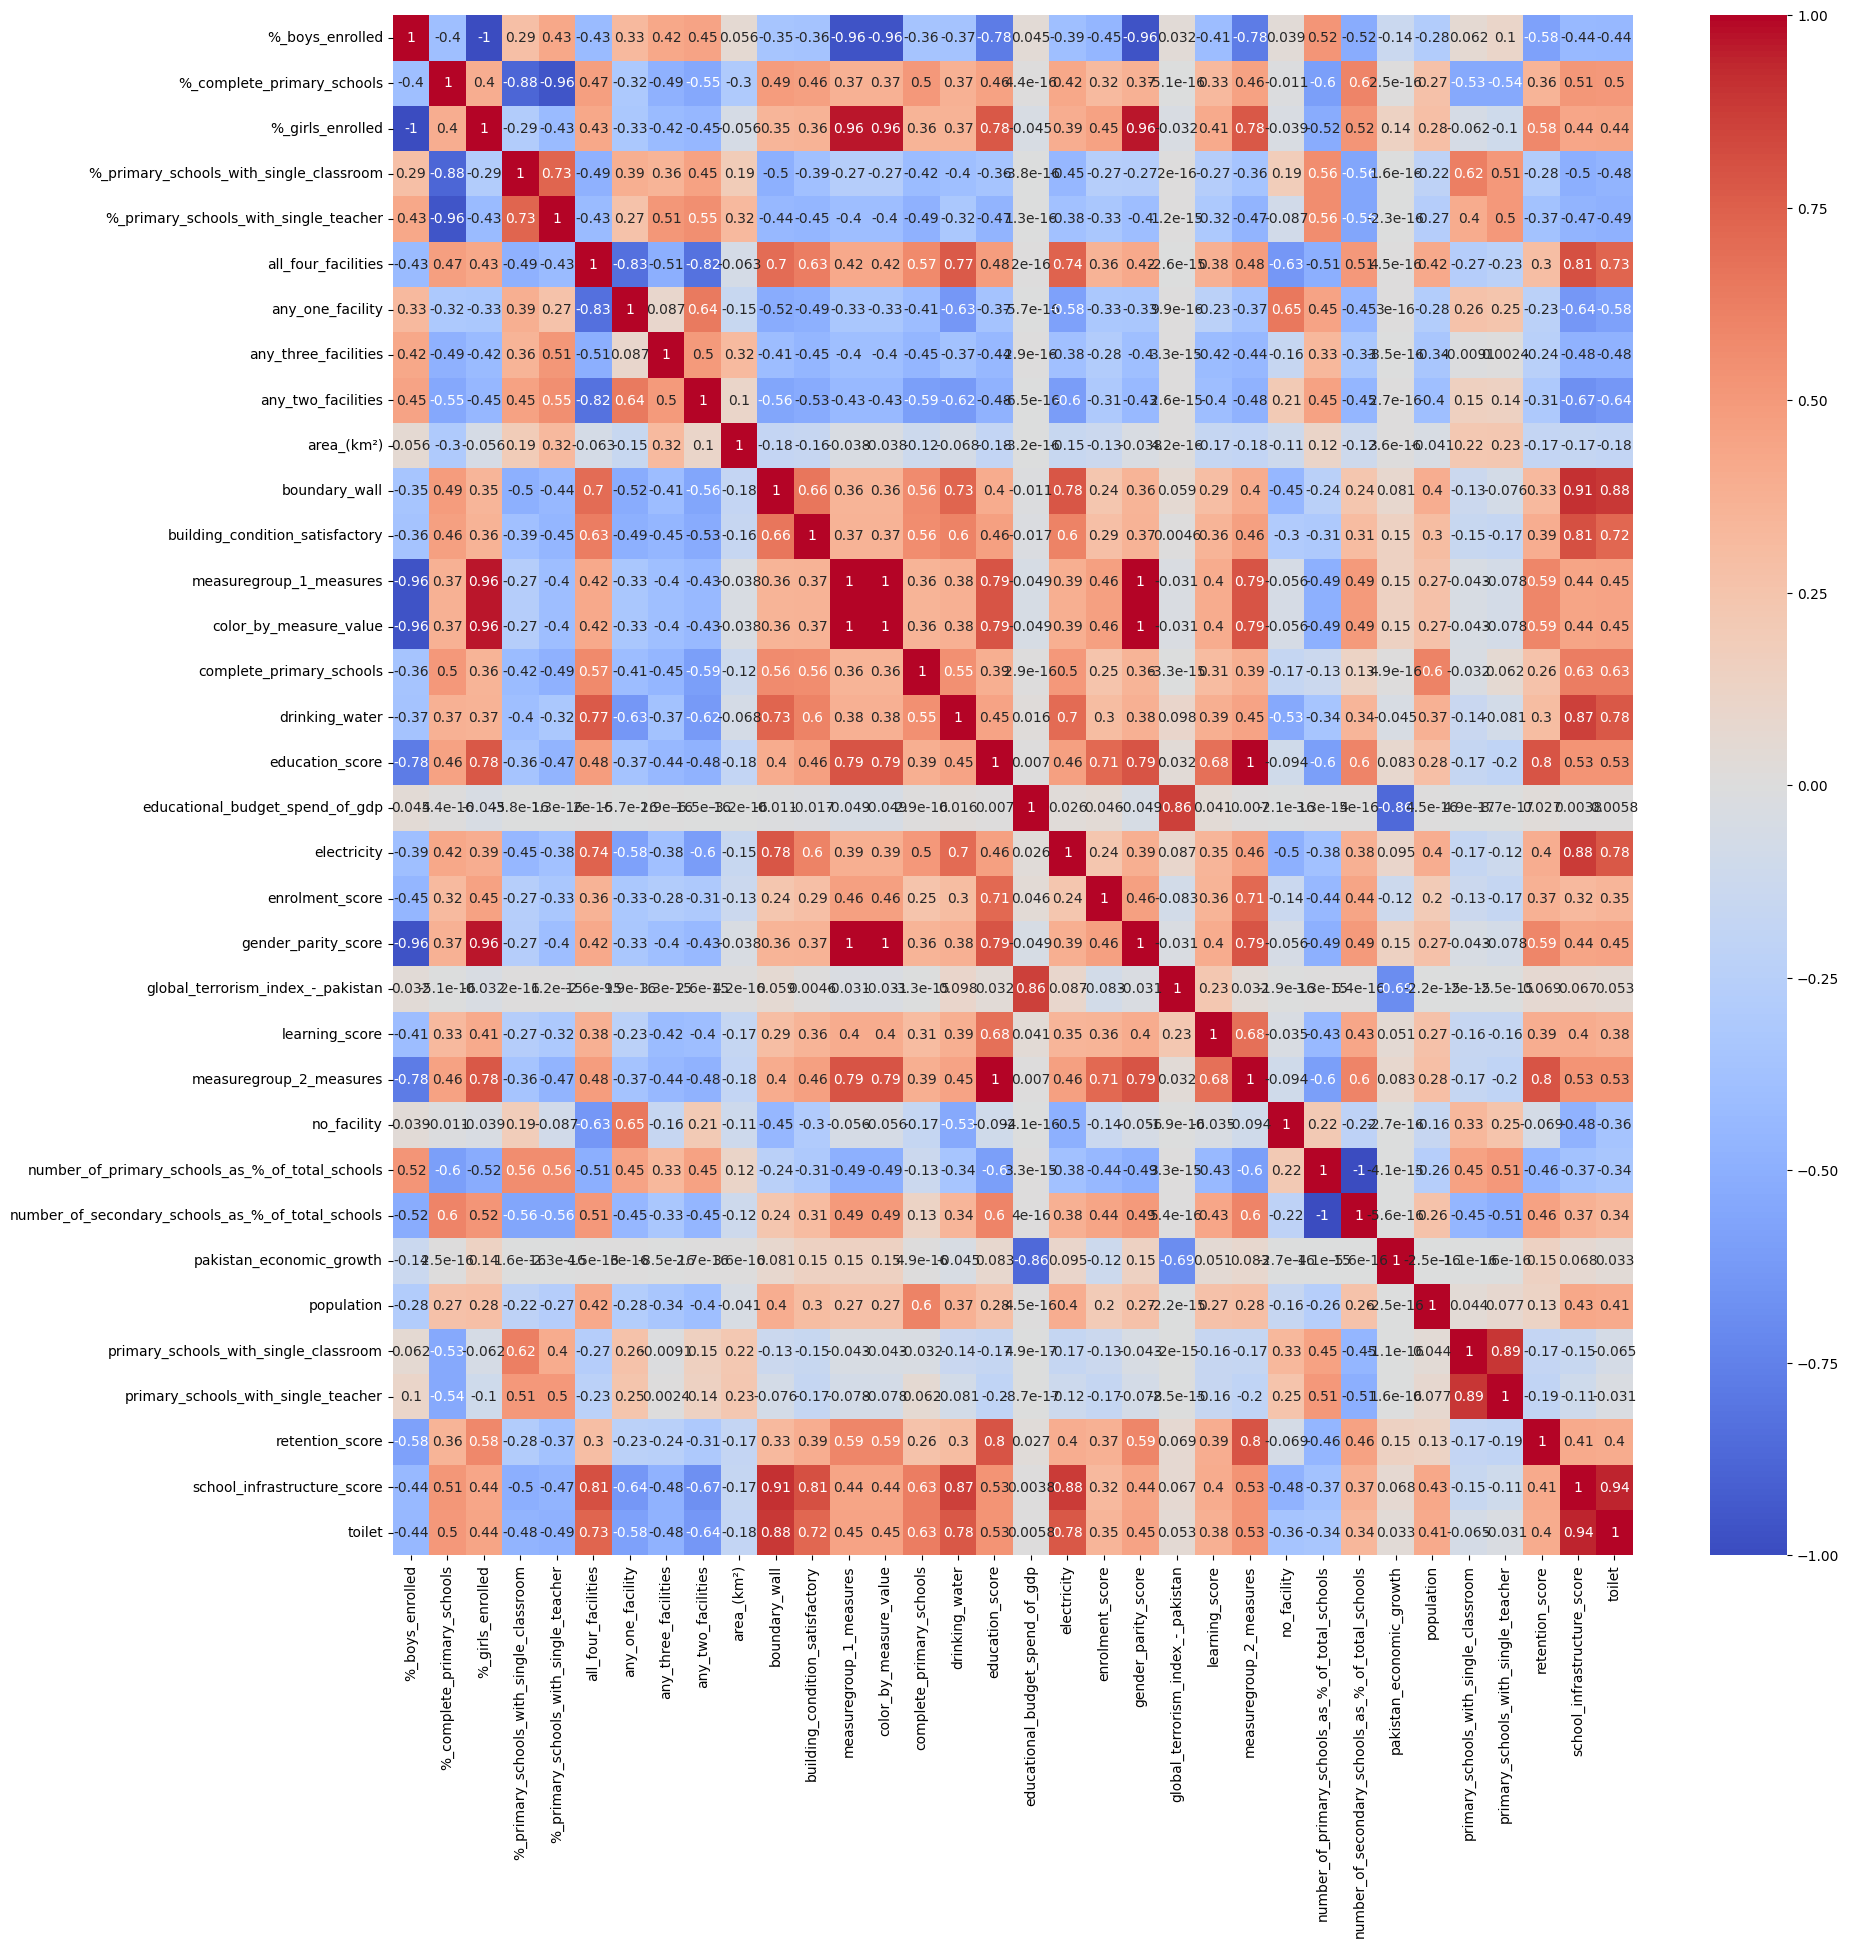

In [ ]:
# Now in a Visualization Format
# Visualize a HeatMap
def visualize_correlation_with_education(df):
    if 'education_score' in df.columns:
        df_float = df.select_dtypes(include='float64') # Select only numerical variables not categorical ones

        corr_matrix = df_float.corr()

        fig, ax = plt.subplots(figsize=(20, 20))

        sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')

visualize_correlation_with_education(df)

The table and heatmap provided offer compelling insights into the various variables that are highly correlated with the Education Score. Notably, variables such as **'retention_score', 'enrolment_score', 'learning_score', 'gender_parity_score',** and **'_girls_enrolled'** demonstrate significant correlation. This is likely because they contribute to the calculation of the Education Score itself, which is a transformed variable derived from the arithmetic mean of these factors.

In addition, we observe that **'MeasureGroup'** variables also exhibit correlation. However, these are primarily clusters of existing variables and can be disregarded for our current analysis.

Furthermore, another variable that warrants attention due to its strong correlation with the Education Score is the **'school_infrastructure_score'**. This variable is a composite measure made up of various features such as **'toilet', 'electricity', 'drinking water',** and **'building_condition_satisfactory'**. Each of these elements has shown to have a substantial correlation with the Education Score.

Considering these observations, it is logical to focus on the aggregate measure of these variables: the '**school_infrastructure_score**' as our primary feature of interest in subsequent analyses.

# Feature Importance / Variables of Interest

After the EDA, we have decided that **Education Score**  can become our target variable and the feature of interest being the **School Infrastructure Score**.

The target variable of interest in our study is the "**Education Score**". This score, according to the data documentation, is calculated as the arithmetic average of the enrolment, survival (retention rate), achievement (learning score), and gender parity scores, with each component given equal weight.

Our primary feature of interest is the "**School Infrastructure Score**". This is a score given to the school based on the availability of facilities such as electricity, drinking water, toilets, boundary walls, and the satisfactory/safe condition of the school building.

# Working Hypothesis
Based on our variables of interest, our working hypothesis for this project is:

"There is a significant correlation between the 'School Infrastructure Score' and the 'Education Score' in Pakistan's education data. We hypothesize that a better school infrastructure, reflected in a higher 'School Infrastructure Score', positively impacts the 'Education Score'. Thus, **improving school facilities can potentially enhance the overall education score.**"

This hypothesis is based on the reasonable assumption validated by our literature review that well-equipped schools (in terms of electricity, drinking water, toilets, boundary walls, and satisfactory/safe condition of the building) provide a conducive environment for learning and retention, ultimately resulting in a higher education score. However, this is an empirical question and will be tested in our analysis.

# Model Development & Validation
On our cleaned data, we are running various Machine Learning models, both Classification and Regression ones, which we have studied throughout the course. These include: Linear Regression, Logistic Regression, Standard Gradient Descent, Decision Trees, Naive Bayes Classifier.

As per the project requirements, models will be validated using a separate validation dataset (not the test set). We are evaluating the accuracy of the model using this validation set.

## Linear Regression Models

## Pre-Processing

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['school_infrastructure_score']]
y = df['education_score']

# Splitting the dataset. Training=60%, Rest=40%.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the 40% data into 20% each (validation and test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print (X_val.shape)
print(X_test.shape)
print (X_train.shape)

(116, 1)
(116, 1)
(348, 1)


Since our target variable is numerical, we will run linear regression models.

### Simple Linear Regression

In [ ]:
# fitting model
linear_reg = LinearRegression().fit(X_train, y_train)

# predicting the values in validation data
y_pred = linear_reg.predict(X_val)

# accessing the model
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

R-squared: 0.2711407819762963
Mean Absolute Error: 9.298444153660709
Mean Squared Error: 135.4383104605


Text(0.5, 1.0, 'Actual vs Predicted Values for Education Score')

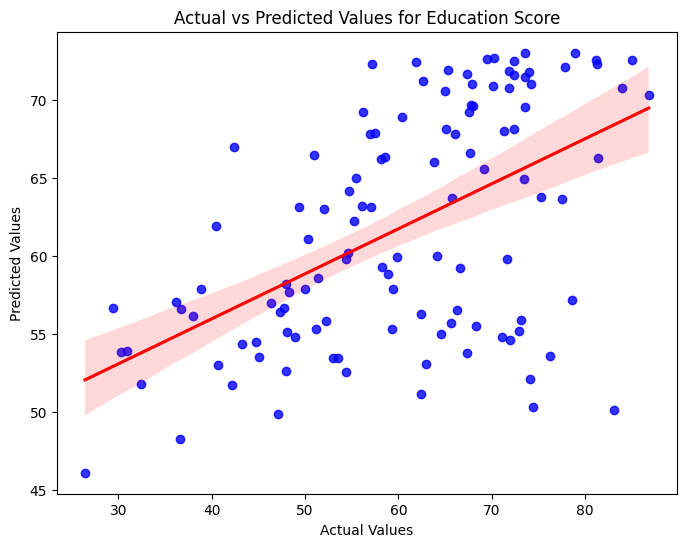

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_val, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Education Score')

### Lasso

In [ ]:
# Running lasso regression (with hyperparatmeter tuning)

param_grid = {'alpha': [0.1, 0.5, 1.0]}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# evaluating the model on validation data
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

# printing best metrics and accessing the performance of model
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Alpha: 0.1
Mean Squared Error: 135.43687569877582
R-squared: 0.2711407819762963


### Ridge

In [ ]:
# Running ridge regression (with hyperparatmeter tuning)

param_grid = {'alpha': [0.1, 0.5, 1.0]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# evaluating the model on validation data
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

# printing best metrics and accessing the performance of model
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Alpha: 1.0
Mean Squared Error: 135.43829861195414
R-squared: 0.2711407819762963


# Classification Models

## Pre-Processing

Let's try running classification models now. But for that we need to turn out Education Score variable into a categorical variable with three classes: High, Medium, Low.

In [ ]:
# PreProcessing

# Convert 'education_score' to category
df['education_score'] = pd.cut(df['education_score'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])

# Convert categories to numerical labels for ML model
df['education_score'], class_names = pd.factorize(df['education_score'])

# Split the dataset into features (X) and target variable (y)
X = df[['school_infrastructure_score']]
y = df['education_score']

In [ ]:
# Splitting the dataset. Training=60%, Rest=40%.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the 40% data into 20% each (validation and test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print (X_val.shape)
print(X_test.shape)
print (X_train.shape)

(116, 1)
(116, 1)
(348, 1)


## Logistic Regression Model

In [ ]:
# Training the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Validating the model (to check accuracy score before hyperparameter tuning)
y_val_pred = log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.6724137931034483


In [ ]:
# Hyperparameters tuning

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter' : [100, 500, 1000]
}


grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', error_score=0)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Evaluation

# Using the best parameters from GridSearchCV to fit the model
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train, y_train)

# Evaluating the model on the validation dataset
y_val_pred = log_reg_best.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

log_reg_acc = val_accuracy

Validation Accuracy: 0.6810344827586207


## KD Trees

In [ ]:
# Train the model
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)


# Validating the model (to check accuracy score before hyperparameter tuning)
y_val_pred = decision_tree.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.6982758620689655


In [ ]:
# Hyperparameters tuning

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

decision_tree_2 = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=decision_tree_2, param_grid=tree_param, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best parameters: {'criterion': 'gini', 'max_depth': 4}


In [ ]:
# Evaluation

# Using the best parameters from GridSearchCV to fit the model
decision_tree_final = grid_search.best_estimator_
decision_tree_final.fit(X_train, y_train)

# Evaluating the model
y_val_pred = decision_tree_final.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

kd_trees_acc = val_accuracy

Validation Accuracy: 0.6896551724137931


## Stochastic Gradient Descent Classifier

In [ ]:
# Train the model
sgdC = SGDClassifier(random_state=42) #can add max_iter, doesn't affect val_accuracy much
sgdC.fit(X_train, y_train)

# Validating the model (to check accuracy score before hyperparameter tuning)
y_val_pred = sgdC.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.47413793103448276


In [ ]:
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
}

sgdC = SGDClassifier(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=sgdC, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Best parameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


In [ ]:
# Evaluation

# Using the best parameters from GridSearchCV to fit the model
sgdC_final = grid_search.best_estimator_
sgdC_final.fit(X_train, y_train)

# Evaluating the model
y_val_pred = sgdC_final.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

sgdC_acc = val_accuracy

Validation Accuracy: 0.47413793103448276


## Naive Bayes Classifier

In [ ]:
# Train the model
bernoulli_nbC = BernoulliNB()
bernoulli_nbC.fit(X_train, y_train)

# Validating the model (to check accuracy score before hyperparameter tuning)
y_val_pred = bernoulli_nbC.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.5517241379310345


In [ ]:
# Hyperparameters tuning

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 3, ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

grid_search = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


Best parameters: {'alpha': 0.01, 'binarize': None, 'class_prior': None, 'fit_prior': True}


In [ ]:
# Evaluation

# Using the best parameters from GridSearchCV to fit the model
bernoulli_nbC_final = grid_search.best_estimator_
bernoulli_nbC_final.fit(X_train, y_train)

# Evaluating the model
y_val_pred = bernoulli_nbC_final.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

bayes_acc = val_accuracy

Validation Accuracy: 0.5517241379310345


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


#  Model Evaluation
Here we evaluate the models based on chosen metric: accuracy. The models are compared, and the best performing model is selected for further presentation.


We chose accuracy score as our metric since we think that misclassfication to any of three classes in our target variables has similar costs. We assume that the importance of classes is equal.

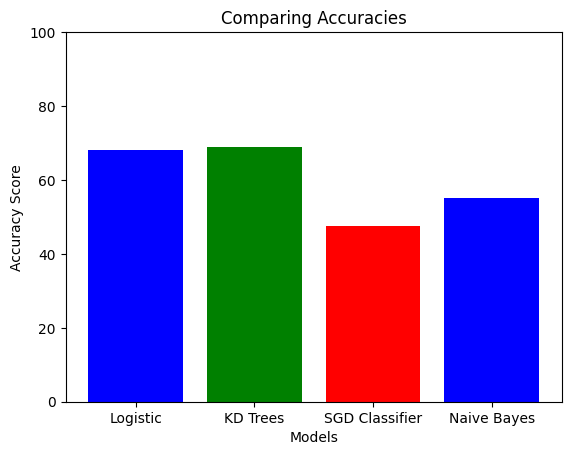

In [ ]:
# Making a bar graph to compare final accuracies of our classifier models

models = ["Logistic", "KD Trees", "SGD Classifier", "Naive Bayes"]
accuracies = [log_reg_acc*100, kd_trees_acc*100, sgdC_acc*100, bayes_acc*100]

plt.ylim(0, 100)

max_index = accuracies.index(max(accuracies))
min_index = accuracies.index(min(accuracies))

colors = ['red' if i == min_index else 'green' if i == max_index else 'blue' for i in range(len(accuracies))]

plt.bar(models, accuracies, color=colors)

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparing Accuracies')

plt.show()

In [ ]:
data = {"Models": models, "Accuracies": accuracies}
df_2 = pd.DataFrame(data)

df_2.sort_values(by='Accuracies', ascending=False)

,Models,Accuracies
1,KD Trees,68.965517
0,Logistic,68.103448
3,Naive Bayes,55.172414
2,SGD Classifier,47.413793


After reviewing the four models we have used, here's the key takeaways:
1. **Linear Regression:** The R-squared value of 0.271 suggests that only 27.1% of the variability in the education score is explained by our model, which isn't very high. The Mean Absolute Error (MAE) and Mean Squared Error (MSE) scores are quite large, suggesting that the model's predictions are, on average, a considerable distance from the actual values.
2. **Lasso and Ridge Regression:** These models have the same R-squared value as the linear regression model, suggesting they haven't significantly improved the explanation of the variability in the education score. The MSEs are virtually the same as well.
3. **Logistic Regression:** Our baseline model had a validation accuracy of 67.2%. After hyperparameter tuning, we managed to improve the accuracy to 68.1%, a minor but worthwhile improvement.
4. **K-D Trees:** The baseline model had a validation accuracy of 69.8%, which is already better than our tuned logistic regression. After hyperparameter tuning, it fell slightly to 68.9%, which is an unexpected result, as hyperparameter tuning usually improves model performance.
5. **SGD Classifier:** With a validation accuracy of 47.4%, this model has not performed well. Its accuracy is lower than a random guess in a balanced three-class problem.
6. **Naive Bayes Classifier:** Similar to the SGD Classifier, the Naive Bayes model shows low performance with an accuracy of 55.2%. Even after hyperparameter tuning, the accuracy did not improve.

Based on accuracy, the best model for our data is the baseline K-D Trees model with an accuracy of **69.8%.**

# Limitations

Our models currently only include the aggregate feature: the school infrastructure score which is a combination of the availability of toilet, drinking water, electricity, and school boundary wall. While this variable might be significant, it's unlikely to capture all the variability in the education score. There may be other relevant factors not included in our model, such as teacher quality, parental involvement, students' socioeconomic status, etc. This is a shortcoming of the dataset we have selected as the only variables we could find were pertaining to education score and infrastructure.

Furthermore, we also anticipate that correlation does not imply causation, so while the school infrastructure score and education score do may move together, they might both be influenced by some other factor we may not be accounting for. In other words, merely improving school infrastructure may not directly cause an improvement in the education score.

Future studies could look into the relationship between education scores and other potential factors such as the quality of the teaching staff, the level of parental or community involvement in schools, the impact of school policies, or the influence of socio-economic factors such as income levels and employment rates. A dataset that is bigger in volume and includes these additional variables would certainly be beneficial. This would allow for the creation of more robust models that could offer a more nuanced understanding of what influences education scores and thus, inform more effective policies and strategies.

# Policy Implications

While our hypothesis still stands, as influenced by the literature review we have conducted, the relatively low R-squared values suggest that there may be other, more influential factors at play that are not included in the current model. While improving school infrastructure might help, it may not have as large of an impact as other interventions.